<a href="https://colab.research.google.com/github/shraishwarya/-Time-Series-Forecasting-using-an-LSTM-Long-Short-Term-Memory-Model/blob/main/Time_Series_Forecasting_using_an_LSTM_(Long_Short_Term_Memory)_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 32s 438ms/step - loss: 0.1573 - val_loss: 0.0851
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - loss: 0.0846 - val_loss: 0.0856
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 0.0914 - val_loss: 0.0854
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0886 - val_loss: 0.0845
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0882 - val_loss: 0.0851
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0857 - val_loss: 0.0865
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0884 - val_loss: 0.0875
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0890 - val_loss: 0.0842
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0863 - val_loss: 0.0863
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0916 - val_loss: 0.0843
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0883 - val_loss: 0.0844
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s

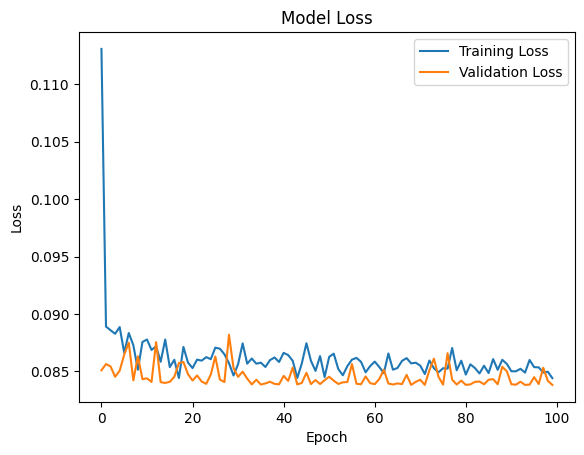

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

# Step 2: Load and preprocess data (example for demonstration)
# Example data, replace with actual data fetching and preprocessing
data = pd.DataFrame({'Open': np.random.rand(1500)})
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data = sc.fit_transform(data)

# Define features and labels
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Step 3: Define the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Step 4: Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
history = regressor.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Optional: Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
